# Introdução da referência e controle integral

Sabemos que um integrador em malha aberta zera o erro de regime permanente (para uma entrada degrau pelo menos) e permite ao sistema rejeitar distúrbios (do tipo degrau). Portanto, a introdução de integradores na malha aberta é um aspecto desejável do projeto. 

Para introduzir um integrador no espaço de estados, adicionamos um novo estado ao sistema, que representa a integral do erro à referência:
$$
\begin{align*}
    {e} = \int (r-y)dt
\end{align*}
$$


Supondo que $y=\mathbf{Cx}$, a equação de estado deste novo sinal é:
$$
\begin{align*}
    \dot{e} = r-\mathbf{Cx}
\end{align*}
$$

Essa última equação aumenta a ordem do sistema em 1. O sistema em malha aberta agora fica:
$$
\begin{align*}
    \dot{\mathbf{x}} &= \mathbf{Ax}+\mathbf{B}u\\
    \dot{e} &= r-\mathbf{Cx}
\end{align*}
$$

Em notação matricial em blocos temos:
$$
\begin{align*}
    \left[\begin{array}{c}\dot{\mathbf{x}}\\ \dot{e}\end{array}\right]&=
    \left[\begin{array}{cc}\mathbf{A} & \mathbf{0}\\-\mathbf{C} & 0\end{array}\right]\left[\begin{array}{c}{\mathbf{x}}\\ {e}\end{array}\right]+\left[\begin{array}{c}\mathbf{B}\\ 0\end{array}\right]u+\left[\begin{array}{c}\mathbf{0}\\ 1\end{array}\right]r
\end{align*}
$$

Dizemos que o sistema está *aumentado*

O algoritmo de controle integral consiste em fazer uma realimentação completa de todos os estados agora definidos.
$$
\begin{align*}
    u = -\mathbf{K}_a\mathbf{x}_a
\end{align*}
$$

## Escolha dos pólos

Perceba que a introdução de um integrador aumenta a ordem do sistema e isso vai requerer a especificação de pólos adicionais. Tente alocar estes pólos em posições estratégicas para não comprometer a dominância dos pólos desejados. 

## Simulação em malha fechada

Com a realimentação do sistema aumentado, as equações em malha fechada serão:
\begin{align}
\dot{\mathbf{x}}_a &= (\mathbf{A}_a-\mathbf{B}_a\mathbf{K}_a)\mathbf{x}_a + 
\left[\begin{array}{c} \mathbf{0}\\ 1 \end{array}\right] r\\
y &= \mathbf{C}\mathbf{x}_a
\end{align}

Se quisermos simular um ou mais distúrbios, por exemplo $\mathbf{\eta}$, basta adicionar colunas apropriadas na matriz de entrada. O caso mais geral seria:
\begin{align}
\dot{\mathbf{x}} &= (\mathbf{A}_a-\mathbf{B}_a\mathbf{K_a})\mathbf{x}_a + 
\left[\begin{array}{cc} \mathbf{0} & \mathbf{\Gamma}\\ 1 & \mathbf{0} \end{array}\right] \left[\begin{array}{c}r\\ \mathbf{\eta} \end{array} \right]\\
y &= \mathbf{C}\mathbf{x}_a + \mathbf{0}\left[\begin{array}{cc}r\\ \mathbf{\eta} \end{array} \right]
\end{align}

Perceba que a realimentação de estados é feita através do sinal $u$. O sinal $r$, de referência não deve ser usado para realimentar. 

## Exemplo:

Construa um regulador com controle integral para o sistema
$$
\begin{align}
    G(s) = \frac{10}{(s+1)(s+2)}
\end{align}
$$
para que $\xi = 0.7$ e $\omega_n=2$.


In [2]:
# Imports
import numpy as np
import control as ct
from IPython.display import display, Math
from matplotlib import pyplot as plt
from escrever import *
esc = escrever()

In [3]:
# Polos desejados
xi = 0.7
wn = 2
sigma = xi*wn
p = -sigma + 1j*wn*np.sqrt(1-xi**2)
p_reg = np.array([p,np.conj(p),-4*sigma])
print('Pólos do regulador: ', p_reg.round(4))

Pólos do regulador:  [-1.4+1.4283j -1.4-1.4283j -5.6+0.j    ]


In [4]:
# Matrizes do sistema em FCC
A = np.array([[-3,-2],[1,0]])
B = np.array([[1],[0]])
C = np.array([[0,10]])
D = np.zeros((1,1))

sys = ct.ss(A,B,C,D)
esc.sist(A,B,C,D)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Função de transf. de malha aberta
ct.tf(sys)

TransferFunction(array([10.]), array([1., 3., 2.]))

In [6]:
# Matrizes do sistema aumentado
Aa = np.block([[A,np.zeros((2,1))],[-C,0]])           # [F  | 0]
Ba = np.block([[B],[0]])
display(Math(r'\mathbf{A}_a = ' + esc.mat(Aa)))
display(Math(r'\mathbf{B}_a = ' + esc.mat(Ba)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
# Regulador com integrador
Ka = ct.acker(Aa,Ba,p_reg)
display(Math(r'\mathbf{K}_a = ' + esc.mat(Ka.round(4))))


<IPython.core.display.Math object>

In [8]:
# Sistema em malha fechada
Amf = Aa - Ba@Ka
Bmf = np.block([[np.zeros((2,1))],[1]])
Cmf = np.block([[C,0]])
Dmf = np.zeros((1,1))
mf = ct.ss(Amf, Bmf,Cmf,Dmf)
esc.sist(Amf.round(4),Bmf.round(4),Cmf.round(4),Dmf)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
# Função de transf. em malha fechada
ct.ss2tf(Amf,Bmf,Cmf,Dmf)

TransferFunction(array([-1.0658141e-14,  2.2400000e+01]), array([ 1.  ,  8.4 , 19.68, 22.4 ]))

In [10]:
# Relatório de polos e zeros em malha fechada
tabela=ct.damp(mf)

print('Zeros: ')
print(round(ct.zeros(mf),4))
print('')


_____Eigenvalue______ Damping___ Frequency_
      -5.6                     1        5.6
      -1.4    +1.428j        0.7          2
      -1.4    -1.428j        0.7          2
Zeros: 
[]



In [20]:
# Simulação em malha fechada (y)
resp = ct.step_response(mf,6)

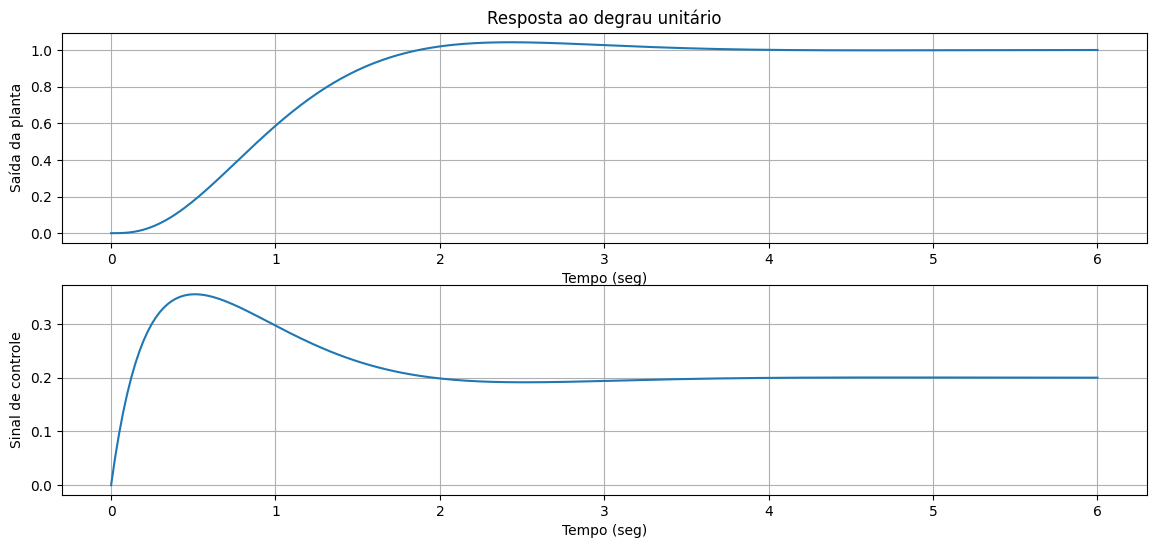

In [22]:
# Plotagem da saída
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(resp.t,resp.outputs)
plt.xlabel('Tempo (seg)')
plt.ylabel('Saída da planta')
plt.title('Resposta ao degrau unitário')
plt.grid()
# Calcula e plota o sinal de controle
u = -Ka@resp.states
plt.subplot(212)
plt.plot(resp.t,u.T)
plt.xlabel('Tempo (seg)')
plt.ylabel('Sinal de controle')
plt.grid()

Para finalizar, vamos analisar o efeito de um distúrbio. Como é o mesmo sistema da aula anterior, vamos aplicar exatamente o mesmo distúrbio.

In [25]:
# Simulação de uma perturbação
Bmf2 = np.block([Bmf, np.array([[0],[1],[0]])])
Dmf2 = np.zeros((Cmf.shape[0],2))
mf2 = ct.ss(Amf,Bmf2,Cmf,Dmf2)
esc.sist(Amf.round(4),Bmf2.round(4),Cmf.round(4),Dmf2.round(4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

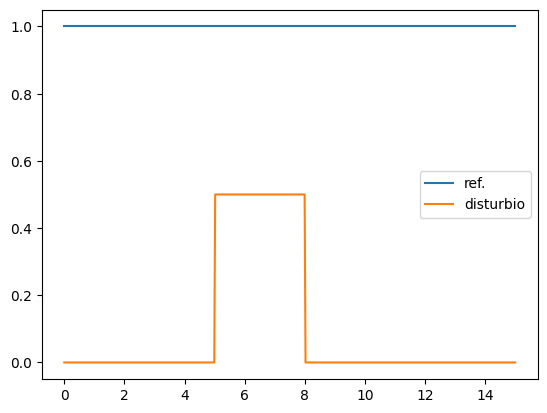

In [29]:
# Criação dos sinais de entrada em MF
num_pontos = 500
t = np.linspace(0,15,num=num_pontos)
deg = lambda t: t>=0
u = np.zeros((2,num_pontos))
u[0,:] = deg(t)
u[1,:] = 0.5*deg(t-5)-0.5*deg(t-8)
plt.plot(t,u.T)
plt.legend(['ref.', 'disturbio'])
plt.show()

In [30]:
# Simulação da malha
resp = ct.forced_response(mf2,t,u)
u = -Ka@resp.states

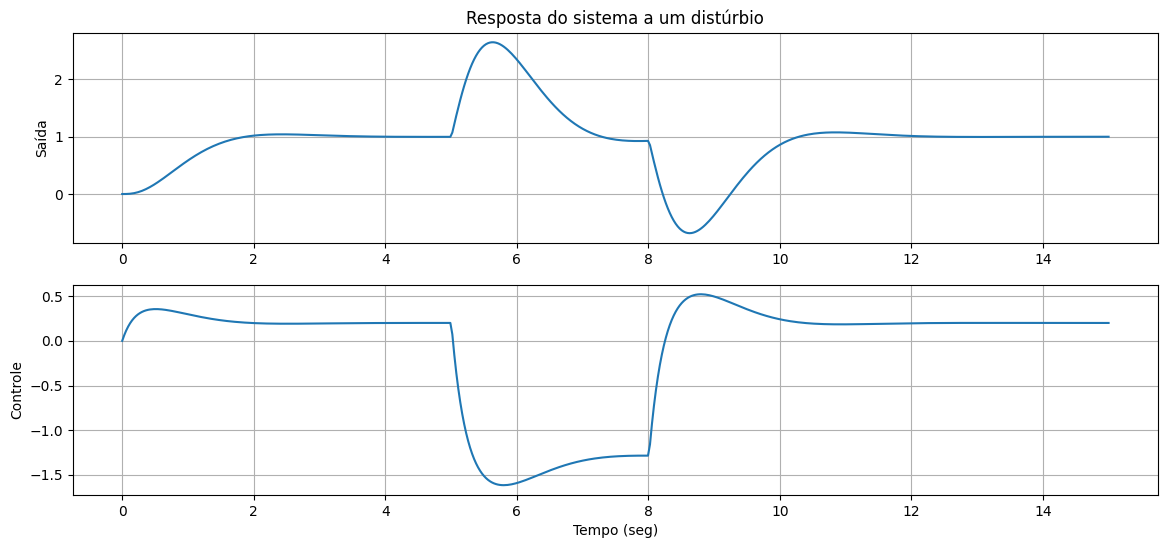

In [31]:
plt.figure(figsize=(14,6))
plt.subplot(211)
plt.plot(resp.t,resp.y.T)
plt.grid()
plt.ylabel('Saída')
plt.title('Resposta do sistema a um distúrbio')
plt.subplot(212)
plt.plot(resp.t,u.T)
plt.ylabel('Controle')
plt.xlabel('Tempo (seg)')
plt.grid()
plt.show()

Perceba que diferente da estratégia de ganho DC unitário, a saída retorna para o valor correto após o distúrbio. O transitório é um pouco elevado, mas o erro é zerado passado algum tempo. Note também que o esforço de controle após o distúrbio é diferente daquele aplicado antes dele ocorrer. 